In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline
import pandas as pd
import plotly.graph_objs as go


In [3]:
from sklearn.decomposition import PCA
pca = PCA()

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('yahoo_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [6]:
df.info() # null 값 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [8]:
df.set_index('Date',inplace=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mm = MinMaxScaler()
sc = StandardScaler()

In [10]:
df.Volume = mm.fit_transform(df[['Volume']])

In [11]:
data = df.Volume.to_frame()

In [12]:
rol_mean = data.rolling(7).mean()
rol_std = data.rolling(7).std()

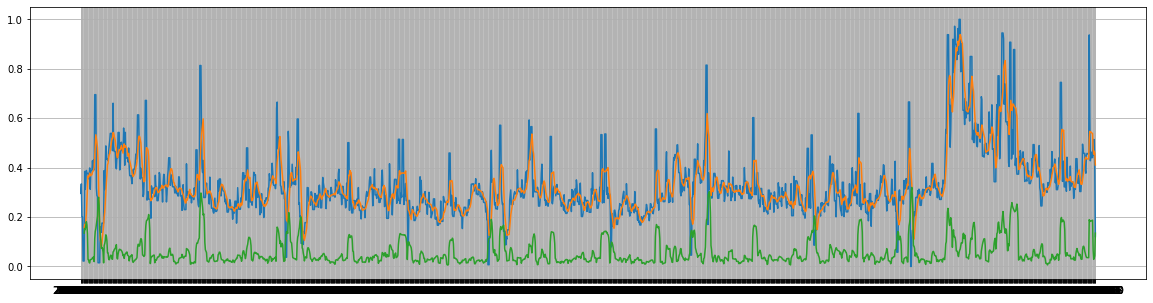

In [13]:
plt.figure(figsize=(20,5))
plt.plot(data)
plt.plot(rol_mean)
plt.plot(rol_std)
plt.grid(True)

In [14]:
data

,Volume
Date,
2015-11-23,0.295740
2015-11-24,0.334066
2015-11-25,0.200874
2015-11-26,0.200874
2015-11-27,0.021979
...,...
2020-11-16,0.514373
2020-11-17,0.452112
2020-11-18,0.513401


In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [16]:
adf_result = adfuller(data)

In [17]:
def ADF_(data):
    adf_result = adfuller(data)
    print('ADF Statistic: %1.5f'%adf_result[0])
    print('p-value: %1.5f'%adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

In [18]:
ADF_(data)

ADF Statistic: -4.72262
p-value: 0.00008
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [19]:
kpss_result = kpss(data)

C:\Users\kody2\anaconda3\envs\aithe1110\lib\site-packages\statsmodels\tsa\stattools.py:1998: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [20]:
print('KPSS test: %1.5f'%kpss_result[0])
print('p-value: %1.5f'%kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS test: 1.23080
p-value: 0.01000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<AxesSubplot:xlabel='Date'>

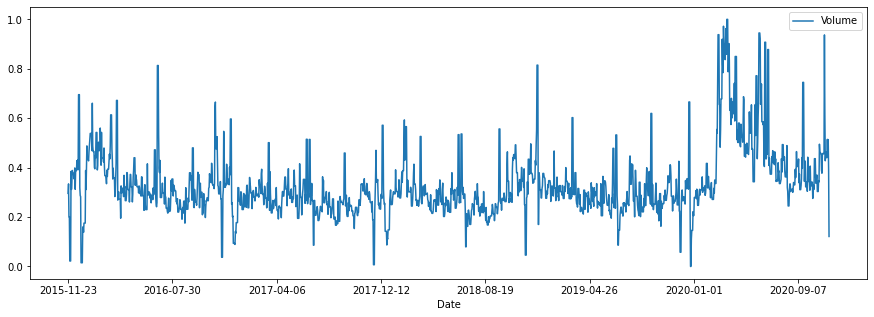

In [21]:
data.plot(figsize=(15,5))

In [22]:
pca_data = pca.fit_transform(data)

In [23]:
pca_df = pd.DataFrame(pca_data,columns=['Volume'], index=data.index)
pca_df

,Volume
Date,
2015-11-23,-0.036350
2015-11-24,0.001975
2015-11-25,-0.131217
2015-11-26,-0.131217
2015-11-27,-0.310111
...,...
2020-11-16,0.182283
2020-11-17,0.120021
2020-11-18,0.181311


<AxesSubplot:xlabel='Date'>

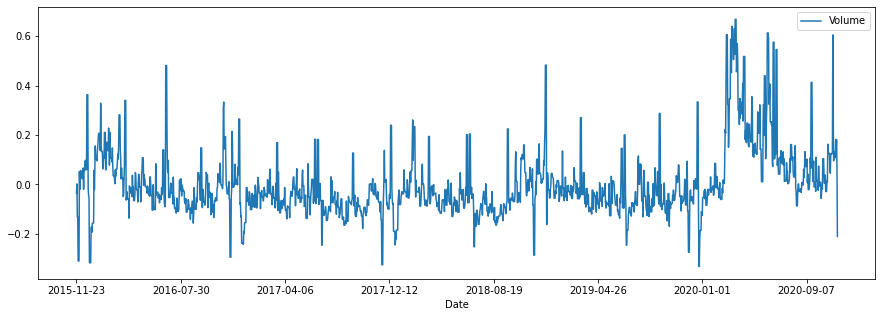

In [24]:
pca_df.plot(figsize=(15,5))

## diff

In [25]:
diff1 = pca_df - pca_df.shift(1)

<AxesSubplot:xlabel='Date'>

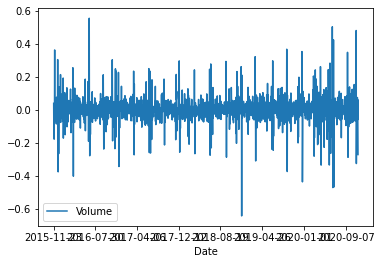

In [26]:
diff1.plot()

In [27]:
df11_result = adfuller(diff1.fillna(0))

In [28]:
ADF_(diff1.fillna(0))

ADF Statistic: -16.45623
p-value: 0.00000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


<AxesSubplot:xlabel='Date'>

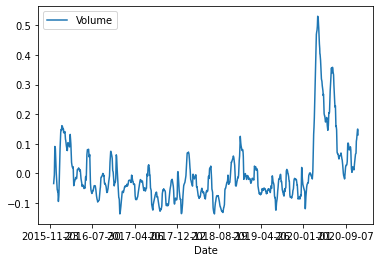

In [29]:
pca_df.rolling(21).mean().plot()

## ACF, PACF

In [30]:
import statsmodels.graphics.tsaplots as sgt 

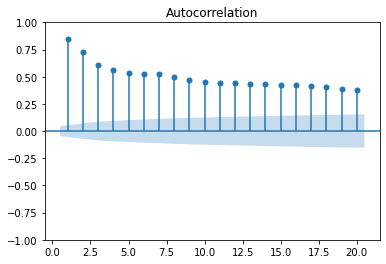

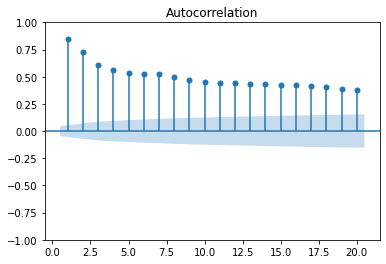

In [31]:
sgt.plot_acf(pca_df, lags =20, zero=False)

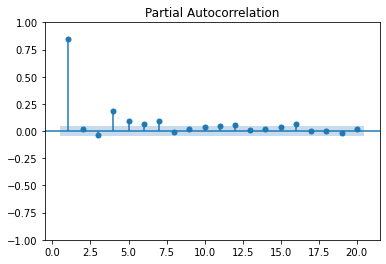

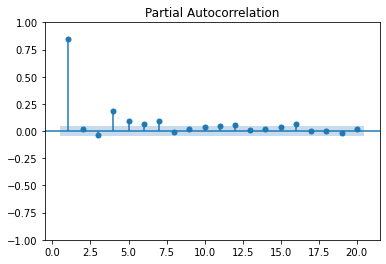

In [32]:
sgt.plot_pacf(pca_df, lags =20, zero=False)

In [33]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["Volume"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
    
input_dim = 30
df_generated = generate_time_lags(pca_df, input_dim)
df_generated

,Volume,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-23,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,0.062455,0.095870,...,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217,0.001975,-0.036350
2015-12-24,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,0.062455,...,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217,0.001975
2015-12-25,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,...,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217
2015-12-26,-0.317207,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,...,0.044563,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217
2015-12-27,-0.317207,-0.317207,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,...,0.044563,0.044563,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,0.124459,0.124459,...,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952,0.104059,0.104059
2020-11-17,0.120021,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,0.124459,...,0.009985,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952,0.104059
2020-11-18,0.181311,0.120021,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,...,0.162650,0.009985,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952


In [34]:
train_x, test_x, train_y, test_y = train_test_split(df_generated.drop('Volume',axis=1),df_generated.Volume, test_size=0.3, random_state=1109 )
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3, random_state=1109 )
train_x.shape, test_x.shape, val_x.shape,train_y.shape, test_y.shape, val_y.shape

((879, 30), (539, 30), (377, 30), (879,), (539,), (377,))

In [35]:
train_x = mm.fit_transform(train_x)
test_x = mm.fit_transform(test_x)
val_x = mm.fit_transform(val_x)

In [36]:
rf_reg = RandomForestRegressor()
ex_reg = ExtraTreesRegressor()

In [37]:
# rf_reg.fit(train_x,train_y)
ex_reg.fit(train_x,train_y)

ExtraTreesRegressor()

In [38]:
ex_reg.score(val_x,val_y)

0.7599031195491288

## RNN 도입

In [39]:
!pip install torch

In [40]:
import torch.optim as optim
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [41]:
df_generated

,Volume,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-23,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,0.062455,0.095870,...,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217,0.001975,-0.036350
2015-12-24,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,0.062455,...,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217,0.001975
2015-12-25,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,0.098839,...,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217,-0.131217
2015-12-26,-0.317207,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,0.059080,...,0.044563,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111,-0.131217
2015-12-27,-0.317207,-0.317207,-0.317207,-0.317207,-0.049759,-0.045013,-0.014113,0.363112,0.363112,0.363112,...,0.044563,0.044563,0.044563,0.056383,0.010456,-0.020328,0.052323,-0.310111,-0.310111,-0.310111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,0.124459,0.124459,...,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952,0.104059,0.104059
2020-11-17,0.120021,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,0.124459,...,0.009985,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952,0.104059
2020-11-18,0.181311,0.120021,0.182283,0.108419,0.108419,0.108419,0.131708,0.095551,0.278080,0.604916,...,0.162650,0.009985,0.015288,-0.028788,-0.028788,-0.028788,0.037945,0.029442,0.004083,0.027952


In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
trend = seasonal_decompose(df_generated.Volume, period=30).trend
seasonal = seasonal_decompose(df_generated.Volume, period=30).seasonal
residual = seasonal_decompose(df_generated.Volume, period=30).resid

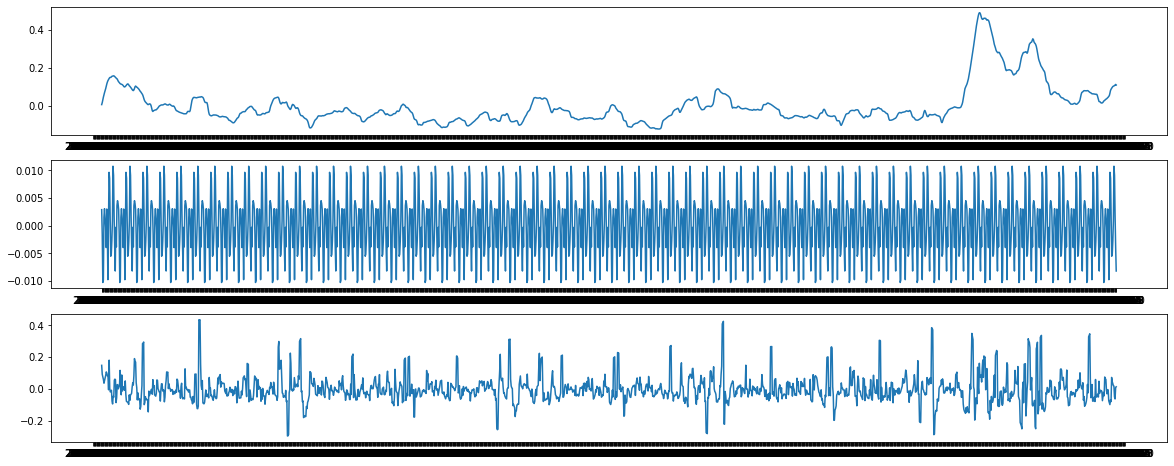

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(311)
plt.plot(trend)


plt.subplot(312)
# plt.axis('off')
plt.plot(seasonal)


plt.subplot(313)
# plt.axis('off')
plt.plot(residual)

In [47]:
import tensorflow as tf

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, GRU
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Scailing

In [56]:
def mm(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

def back_mm(data, value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back

In [58]:
dataDIm = df_generated.shape[1]
hidden = 10
output = 1
lr = 0.001
iterlations = 500

1795

In [67]:
train_x.shape, val_x.shape, test_x.shape

((879, 30), (377, 30), (539, 30))

## 3차원  numpy 변경

In [70]:
trainx = np.reshape(train_x, (train_x.shape[0],1,train_x.shape[1]))
valx = np.reshape(val_x, (val_x.shape[0],1,val_x.shape[1]))
testx = np.reshape(test_x, (test_x.shape[0],1,test_x.shape[1]))

In [106]:
model = Sequential()
model.add(GRU(30,
               activation ='tanh',
               input_shape = (1,30)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 30)                5580      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,611
Trainable params: 5,611
Non-trainable params: 0
_________________________________________________________________


In [113]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae','mape'])
early_stop = EarlyStopping(monitor='val_loss', patience=50) # 조기종료 patience 횟수 만큼 훈련에 개선되지 않으면 종료

model.fit(trainx,train_y, validation_data=(valx,val_y), epochs=3000, batch_size=16, callbacks=[early_stop])

Epoch 1/3000
55/55 [==============================] - 2s 12ms/step - loss: 0.0052 - mae: 0.0479 - mape: 165.2213 - val_loss: 0.0057 - val_mae: 0.0535 - val_mape: 293.9469
Epoch 2/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0451 - mape: 171.3966 - val_loss: 0.0053 - val_mae: 0.0453 - val_mape: 395.0618
Epoch 3/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0443 - mape: 137.8278 - val_loss: 0.0051 - val_mae: 0.0465 - val_mape: 313.1925
Epoch 4/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0463 - mape: 164.9175 - val_loss: 0.0053 - val_mae: 0.0485 - val_mape: 301.9820
Epoch 5/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0449 - mape: 147.6821 - val_loss: 0.0049 - val_mae: 0.0435 - val_mape: 345.3038
Epoch 6/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0048 - mae: 0.0445 - mape: 164.6367 - val_loss: 0.0055 - val_mae: 0.0509 

Epoch 49/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0465 - mape: 144.9244 - val_loss: 0.0052 - val_mae: 0.0482 - val_mape: 304.9327
Epoch 50/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0047 - mae: 0.0428 - mape: 126.5051 - val_loss: 0.0053 - val_mae: 0.0491 - val_mape: 297.4313
Epoch 51/3000
55/55 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0445 - mape: 143.8048 - val_loss: 0.0053 - val_mae: 0.0485 - val_mape: 310.9386
Epoch 52/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0046 - mae: 0.0428 - mape: 153.5044 - val_loss: 0.0050 - val_mae: 0.0463 - val_mape: 313.7193
Epoch 53/3000
55/55 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0434 - mape: 140.4401 - val_loss: 0.0056 - val_mae: 0.0516 - val_mape: 301.6158
Epoch 54/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0433 - mape: 138.9483 - val_loss: 0.0055 - val_mae: 0.

Epoch 97/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0438 - mape: 141.9898 - val_loss: 0.0053 - val_mae: 0.0490 - val_mape: 311.3272
Epoch 98/3000
55/55 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0450 - mape: 148.7064 - val_loss: 0.0050 - val_mae: 0.0470 - val_mape: 318.0203
Epoch 99/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0437 - mape: 147.6048 - val_loss: 0.0053 - val_mae: 0.0503 - val_mape: 311.3179
Epoch 100/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0049 - mae: 0.0469 - mape: 153.1198 - val_loss: 0.0052 - val_mae: 0.0488 - val_mape: 319.2505
Epoch 101/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0432 - mape: 155.6297 - val_loss: 0.0072 - val_mae: 0.0667 - val_mape: 311.7100
Epoch 102/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.0044 - mae: 0.0438 - mape: 190.7326 - val_loss: 0.0052 - val_mae:

In [104]:
pred = model.predict(testx)

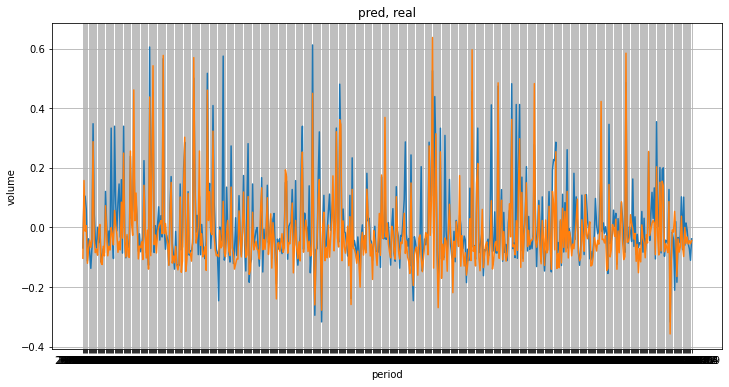

In [105]:
plt.figure(figsize=(12,6))
plt.title('pred, real')
plt.ylabel('volume')
plt.xlabel('period')
plt.plot(test_y,label = 'actual')
plt.plot(pred,label = 'prediction')
plt.grid()
